# Figure 3: Ocean Heat Content trend time series

This notebook will reproduce Figure 3 from *Ocean Heat Content responses to changing Anthropogenic Aerosol Forcing Strength: regional and multi-decadal variability*, E. Boland et al. 2022 ([pre-print](https://doi.org/10.1002/essoar.10511062.3)). This will require utils.py (expects to find it in ../code) and input datafiles (expects to find them in ../data_in) to run - please see the README for details.

The data files loaded were created as follows:
- longfit_obs\_\[centre\].nc and allfit_obs\_\[centre\].nc from ohc_weightedtrends_obs.py
- longfit_smurphs.nc and allfit_smurphs.nc from ohc_trends.py


Please attribute any plots or code from this notebook using the DOI from Zenodo: [10.5281/zenodo.6418479](https://doi.org/10.5281/zenodo.6418479)

E Boland Nov 2022 [emmomp@bas.ac.uk](email:emmomp@bas.ac.uk)

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0,'../code')
import utils #contains useful functions

In [2]:
# Directories for saving plots and finding input data
figs_dir = '../figs/' # Where you want the plots saved
data_dir='../data_in/' # Where the input data is (see README)

# Experiment info, don't alter
exps=['hist-0p2','hist-0p4','hist-0p7','hist-1p0','hist-1p5']
runs=['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1']
exp_names=['0.2','0.4','0.7','1.0','1.5']
smurphs_cmap= [(255/255, 0 , 0),(255/255 ,165/255,   0),(190/255, 190/255, 190/255),(0   ,0 ,255/255),(160 /255, 32/255 ,240/255)]

# Plotting choices
alpha=0.6
s_pts = [1980+15.5,1960+15.5,1940+15.5]
s_labels=['1955-2014','1980-2010','1960-1990','1940-1970']
cmap=smurphs_cmap
obs_linestyle={'iap':'-','noaa':'--'}
obs_labels=['IAP17','WOA18']
drange_label={'OHC0-700m':'0-700m','OHC0-2000m':'0-2000m'}

In [3]:
# Load 1955-end fits
long_fits={}
long_fits['iap']=xr.open_dataarray(data_dir+'ohc_trends/longfit_obs_iap.nc')
long_fits['noaa']=xr.open_dataarray(data_dir+'ohc_trends/longfit_obs_noaa.nc')
long_fits['model']=xr.open_dataarray(data_dir+'ohc_trends/longfit_model.nc')

In [4]:
#Load running fits
running_fits={}
running_fits['iap']=xr.open_dataarray(data_dir+'ohc_trends/allfit_obs_iap.nc')
running_fits['noaa']=xr.open_dataarray(data_dir+'ohc_trends/allfit_obs_noaa.nc',decode_times=False)
running_fits['model']=xr.open_dataarray(data_dir+'ohc_trends/allfit_model.nc')

<ipython-input-5-4cd2c6eb47c2>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',])
<ipython-input-5-4cd2c6eb47c2>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',])
<ipython-input-5-4cd2c6eb47c2>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',])
<ipython-input-5-4cd2c6eb47c2>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',])
<ipython-input-5-4cd2c6eb47c2>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',])
<ipython-input-5-4cd2c6eb47c2>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',])
<ipython-input-5-4cd2c6eb47c2>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',])
<ipython-input-5-4cd2c6eb47c2>:23:

Text(0.5, 0.93, 'Global Heat Content trends')

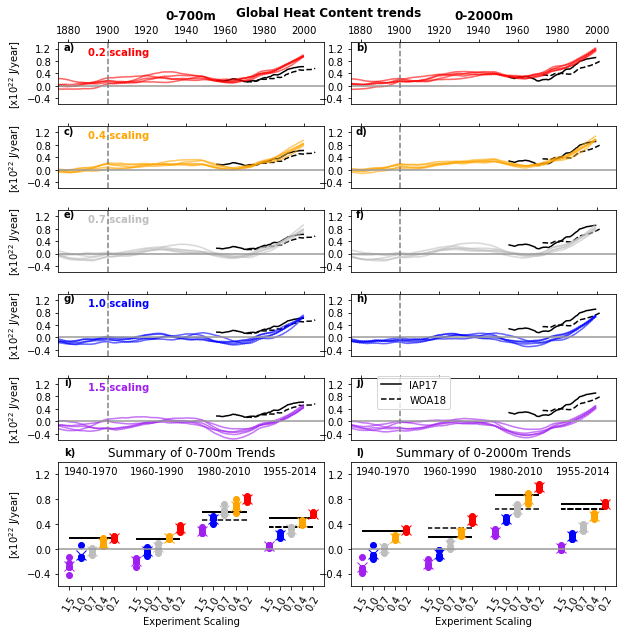

In [5]:
%matplotlib inline
fig, axes = plt.subplots(6, 2, gridspec_kw={'height_ratios': [1, 1, 1, 1, 1, 2],'hspace':0.3,'wspace':0.1},sharey='col',figsize=(10,10))

for ir,drange in enumerate(['OHC0-700m','OHC0-2000m']):
    for ie,exp in enumerate(exps):
        ax=axes[ie,ir]
        line_obs=[]
        for obs in ['iap','noaa']:
            dplot=running_fits[obs].sel(parameter='slope',drange=drange)*12
            line_obs.append(dplot.plot(color='black',ax=ax,linestyle=obs_linestyle[obs])[0])
        for irun,run in enumerate(runs):
            dplot=running_fits['model'].sel(parameter='slope',drange=drange).isel(exp=ie,run=irun)*12
            dplot.plot(ax=ax,label=exp,color=cmap[ie],alpha=alpha) 
        ax.axhline(color=[0.6,0.6,0.6])
        if ir == 0:
            ax.set_ylabel('[x10$^{22}$ J/year]')            
            ax.text(0.11,0.8,'{} scaling'.format(exp_names[ie]),{'fontweight':'bold'},color=cmap[ie],transform=ax.transAxes)
        else:
            ax.set_ylabel('')
            if ie==4:
                ax.legend(line_obs,obs_labels,loc=(0.1,0.5))
        if ie>0:
            ax.set_xticklabels(['',])
            ax.set_xlabel('')
        else:        
            ax.set_xlabel('')
        if ie == 0:
            ax.set_title(drange_label[drange],weight='bold')
        else:
            ax.set_title('')
        ax.xaxis.tick_top()
        ax.set_yticks(np.arange(-0.4,1.8,0.4))
        ax.text(0.02,0.88,'{})'.format(chr(ord('a')+ie*2+ir)),fontweight='bold',transform=ax.transAxes)
        ax.set_xlim([1875,2010])
        ax.axvline(1900,color='grey',ls='--')
        
    ax=axes[5,ir]
    for ss in range(1,4):
        for ie,exp in enumerate(exps):    
            dplot=running_fits['model'].sel(parameter='slope',drange=drange,exp=exp,time_years=s_pts[ss-1])*12
            p1=ax.plot(ie+ss*6*np.ones([5,1]),dplot,'o',color=cmap[ie])
            p2=ax.plot(ie+ss*6,dplot.mean(dim='run'),'x',color=cmap[ie],ms=10)
            dplot=running_fits['iap'].sel(parameter='slope',drange=drange,time_yrs=s_pts[ss-1])*12
            p3=ax.hlines(dplot,ss*6,ss*6+4,'k',obs_linestyle['iap'])
        if ss<3:
            dplot=running_fits['noaa'].sel(parameter='slope',drange=drange).sel(time_yrs=s_pts[ss-1],method='nearest')*12            
            p4=ax.hlines(dplot,ss*6,ss*6+4,'k',obs_linestyle['noaa'])
        ax.text(ss*6+4.5,1.2,s_labels[ss])
    ss=0
    for ie,exp in enumerate(exps):   
        dplot=long_fits['model'].sel(parameter='slope',exp=exp,drange=drange)*12
        p1=ax.plot(ie+ss*6*np.ones([5,1]),dplot,'o',color=cmap[ie])
        p2=ax.plot(ie+ss*6,dplot.mean(dim='run'),'x',color=cmap[ie],ms=10)
        for obs in ['iap','noaa']:
            dplot=long_fits[obs].sel(parameter='slope',drange=drange)*12  
            p3=ax.hlines(dplot,ss*6,ss*6+4,'k',obs_linestyle[obs])
    ax.text(ss*6+4.5,1.2,s_labels[ss])
    ax.set_xlim([23,-1])
    ax.set_xticks([0,1,2,3,4,6,7,8,9,10,12,13,14,15,16,18,19,20,21,22])
    ax.set_xticklabels(['0.2','0.4','0.7','1.0','1.5']*4,rotation=60)
    if ir ==0:
        ax.set_ylabel('[x10$^{22}$ J/year]')
    else:  
        ax.set_ylabel('')
    ax.set_title('Summary of {} Trends'.format(drange_label[drange]))
    ax.set_ylim([-0.6,1.4])
    ax.set_xlabel('Experiment Scaling')    
    ax.axhline(color=[0.6,0.6,0.6])
    ax.text(0.02,1.05,'{})'.format(chr(ord('a')+10+ir)),fontweight='bold',transform=ax.transAxes)
        
fig.suptitle('Global Heat Content trends',weight='bold',y=0.93)
plt.savefig(figs_dir+'Fig3_globalvsobs_trends.png',bbox_inches='tight')